## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [360]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [361]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_1551_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (43472, 30)


In [362]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [363]:
DA.df_raw

,sn,ts,er,pac,lng,lat,roof_type,angle,temperature_2m,relative_humidity_2m,...,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,variable_date,full_time
0,GSABZT036K000A240511082,2024-09-25 08:45:00,NaN,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.2191,85.1132,...,258.9352,241.6133,0.5766,0.7099,0.7415,283.7877,292.0988,295.3640,2024-09-25 08:45:00,2024-09-25 08:45:00
1,GSABZT036K000A240511082,2024-09-25 08:55:00,0.0,9.67,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-25 08:55:00
2,GSABZT036K000A240511082,2024-09-25 09:00:00,NaN,9.69,112.86908,26.465662,阳光棚双坡,5.0,23.3998,84.2316,...,265.1116,256.2260,0.6071,0.7159,0.7406,276.8385,284.7831,288.2556,2024-09-25 09:00:00,2024-09-25 09:00:00
3,GSABZT036K000A240511082,2024-09-25 09:05:00,NaN,10.15,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-25 09:05:00
4,GSABZT036K000A240511082,2024-09-25 09:10:00,NaN,11.06,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-25 09:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43467,GSABZT036K000A240511082,2025-05-10 18:55:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-10 18:55:00
43468,GSABZT036K000A240511082,2025-05-10 19:00:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.3316,38.5143,...,0.0000,4.4402,5.1179,8.3546,9.1925,346.8519,350.0494,351.0183,2025-05-10 19:00:00,2025-05-10 19:00:00
43469,GSABZT036K000A240511082,2025-05-10 19:05:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-10 19:05:00
43470,GSABZT036K000A240511082,2025-05-10 19:10:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-10 19:10:00


In [364]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [365]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

,full_time,sn,ts,er,pac,lng,lat,roof_type,angle,temperature_2m,...,direct_radiation,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,variable_date
0,2024-09-25 08:45:00,GSABZT036K000A240511082,2024-09-25 08:45:00,NaN,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.2191,...,159.7822,258.9352,241.6133,0.5766,0.7099,0.7415,283.7877,292.0988,295.3640,2024-09-25 08:45:00
1,2024-09-25 08:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-25 08:55:00,GSABZT036K000A240511082,2024-09-25 08:55:00,0.0,9.67,112.86908,26.465662,阳光棚双坡,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-25 09:00:00,GSABZT036K000A240511082,2024-09-25 09:00:00,NaN,9.69,112.86908,26.465662,阳光棚双坡,5.0,23.3998,...,171.2204,265.1116,256.2260,0.6071,0.7159,0.7406,276.8385,284.7831,288.2556,2024-09-25 09:00:00
4,2024-09-25 09:05:00,GSABZT036K000A240511082,2024-09-25 09:05:00,NaN,10.15,112.86908,26.465662,阳光棚双坡,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65498,2025-05-10 18:55:00,GSABZT036K000A240511082,2025-05-10 18:55:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65499,2025-05-10 19:00:00,GSABZT036K000A240511082,2025-05-10 19:00:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.3316,...,0.0000,0.0000,4.4402,5.1179,8.3546,9.1925,346.8519,350.0494,351.0183,2025-05-10 19:00:00
65500,2025-05-10 19:05:00,GSABZT036K000A240511082,2025-05-10 19:05:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65501,2025-05-10 19:10:00,GSABZT036K000A240511082,2025-05-10 19:10:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [366]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    1,   119,   120,   121,   122,   123,   124,   125,   126,   127,
        ...
        65329, 65330, 65331, 65332, 65333, 65334, 65335, 65336, 65337, 65398],
       dtype='int64', length=33051),
 True)

In [367]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [368]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [369]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    1,   119,   120,   121,   122,   123,   124,   125,   126,   127,
        ...
        65329, 65330, 65331, 65332, 65333, 65334, 65335, 65336, 65337, 65398],
       dtype='int64', length=33051),
 True)

In [370]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [371]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [372]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        65329, 65330, 65331, 65332, 65333, 65334, 65335, 65336, 65337, 65398],
       dtype='int64', length=33507),
 True)

In [373]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [374]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [375]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    1,   119,   120,   121,   122,   123,   124,   125,   126,   127,
        ...
        65329, 65330, 65331, 65332, 65333, 65334, 65335, 65336, 65337, 65398],
       dtype='int64', length=33051),
 True)

In [376]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [377]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [378]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    1,   119,   120,   121,   122,   123,   124,   125,   126,   127,
        ...
        65329, 65330, 65331, 65332, 65333, 65334, 65335, 65336, 65337, 65398],
       dtype='int64', length=33051),
 True)

In [379]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [380]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [381]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    1,     2,     4,     5,     7,     8,    10,    11,    13,    14,
        ...
        65488, 65489, 65491, 65492, 65494, 65495, 65497, 65498, 65500, 65501],
       dtype='int64', length=43668),
 True)

In [382]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


,full_time,sn,ts,er,pac,lng,lat,roof_type,angle,temperature_2m,...,direct_radiation,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,variable_date
0,2024-09-25 08:45:00,GSABZT036K000A240511082,2024-09-25 08:45:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.219100,...,159.782200,258.935200,241.6133,0.576600,0.709900,0.741500,283.787700,292.098800,295.364000,2024-09-25 08:45:00
1,2024-09-25 08:50:00,GSABZT036K000A240511082,2024-09-25 08:50:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.279333,...,163.594933,260.994000,246.4842,0.586767,0.711900,0.741200,281.471300,289.660233,292.994533,NaN
2,2024-09-25 08:55:00,GSABZT036K000A240511082,2024-09-25 08:55:00,0.0,9.67,112.86908,26.465662,阳光棚双坡,5.0,23.339567,...,167.407667,263.052800,251.3551,0.596933,0.713900,0.740900,279.154900,287.221667,290.625067,NaN
3,2024-09-25 09:00:00,GSABZT036K000A240511082,2024-09-25 09:00:00,0.0,9.69,112.86908,26.465662,阳光棚双坡,5.0,23.399800,...,171.220400,265.111600,256.2260,0.607100,0.715900,0.740600,276.838500,284.783100,288.255600,2024-09-25 09:00:00
4,2024-09-25 09:05:00,GSABZT036K000A240511082,2024-09-25 09:05:00,0.0,10.15,112.86908,26.465662,阳光棚双坡,5.0,23.452367,...,172.446533,263.389667,260.6770,0.606167,0.707833,0.730633,275.674367,283.745033,287.367500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65498,2025-05-10 18:55:00,GSABZT036K000A240511082,2025-05-10 18:55:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.384933,...,0.000000,0.000000,5.9203,5.175367,8.435433,9.278700,346.848467,349.999933,350.956167,NaN
65499,2025-05-10 19:00:00,GSABZT036K000A240511082,2025-05-10 19:00:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.331600,...,0.000000,0.000000,4.4402,5.117900,8.354600,9.192500,346.851900,350.049400,351.018300,2025-05-10 19:00:00
65500,2025-05-10 19:05:00,GSABZT036K000A240511082,2025-05-10 19:05:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.282833,...,0.000000,0.000000,3.4535,5.067333,8.278733,9.110433,346.433433,349.665467,350.644267,NaN
65501,2025-05-10 19:10:00,GSABZT036K000A240511082,2025-05-10 19:10:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.234067,...,0.000000,0.000000,2.4668,5.016767,8.202867,9.028367,346.014967,349.281533,350.270233,NaN


In [383]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [384]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [385]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=65503, step=1), True)

In [386]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [387]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

,full_time,sn,ts,er,pac,lng,lat,roof_type,angle,temperature_2m,...,direct_radiation,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,variable_date
ts,,,,,,,,,,,,,,,,,,,,,
2024-09-25 08:45:00,2024-09-25 08:45:00,GSABZT036K000A240511082,2024-09-25 08:45:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.219100,...,159.782200,258.935200,241.6133,0.576600,0.709900,0.741500,283.787700,292.098800,295.364000,2024-09-25 08:45:00
2024-09-25 08:50:00,2024-09-25 08:50:00,GSABZT036K000A240511082,2024-09-25 08:50:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.279333,...,163.594933,260.994000,246.4842,0.586767,0.711900,0.741200,281.471300,289.660233,292.994533,2024-09-25 08:50:00
2024-09-25 08:55:00,2024-09-25 08:55:00,GSABZT036K000A240511082,2024-09-25 08:55:00,0.0,9.67,112.86908,26.465662,阳光棚双坡,5.0,23.339567,...,167.407667,263.052800,251.3551,0.596933,0.713900,0.740900,279.154900,287.221667,290.625067,2024-09-25 08:55:00
2024-09-25 09:00:00,2024-09-25 09:00:00,GSABZT036K000A240511082,2024-09-25 09:00:00,0.0,9.69,112.86908,26.465662,阳光棚双坡,5.0,23.399800,...,171.220400,265.111600,256.2260,0.607100,0.715900,0.740600,276.838500,284.783100,288.255600,2024-09-25 09:00:00
2024-09-25 09:05:00,2024-09-25 09:05:00,GSABZT036K000A240511082,2024-09-25 09:05:00,0.0,10.15,112.86908,26.465662,阳光棚双坡,5.0,23.452367,...,172.446533,263.389667,260.6770,0.606167,0.707833,0.730633,275.674367,283.745033,287.367500,2024-09-25 09:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-10 18:55:00,2025-05-10 18:55:00,GSABZT036K000A240511082,2025-05-10 18:55:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.384933,...,0.000000,0.000000,5.9203,5.175367,8.435433,9.278700,346.848467,349.999933,350.956167,2025-05-10 18:55:00
2025-05-10 19:00:00,2025-05-10 19:00:00,GSABZT036K000A240511082,2025-05-10 19:00:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.331600,...,0.000000,0.000000,4.4402,5.117900,8.354600,9.192500,346.851900,350.049400,351.018300,2025-05-10 19:00:00
2025-05-10 19:05:00,2025-05-10 19:05:00,GSABZT036K000A240511082,2025-05-10 19:05:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.282833,...,0.000000,0.000000,3.4535,5.067333,8.278733,9.110433,346.433433,349.665467,350.644267,2025-05-10 19:05:00


In [388]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [389]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [390]:
DA.df_raw

,full_time,sn,ts,er,pac,lng,lat,roof_type,angle,temperature_2m,...,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,pac_copy,variable_date
2024-09-25 08:45:00,2024-09-25 08:45:00,GSABZT036K000A240511082,2024-09-25 08:45:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.219100,...,258.935200,241.6133,0.576600,0.709900,0.741500,283.787700,292.098800,295.364000,0.00,2024-09-25 08:45:00
2024-09-25 08:50:00,2024-09-25 08:50:00,GSABZT036K000A240511082,2024-09-25 08:50:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,23.279333,...,260.994000,246.4842,0.586767,0.711900,0.741200,281.471300,289.660233,292.994533,0.00,2024-09-25 08:50:00
2024-09-25 08:55:00,2024-09-25 08:55:00,GSABZT036K000A240511082,2024-09-25 08:55:00,0.0,9.67,112.86908,26.465662,阳光棚双坡,5.0,23.339567,...,263.052800,251.3551,0.596933,0.713900,0.740900,279.154900,287.221667,290.625067,9.67,2024-09-25 08:55:00
2024-09-25 09:00:00,2024-09-25 09:00:00,GSABZT036K000A240511082,2024-09-25 09:00:00,0.0,9.69,112.86908,26.465662,阳光棚双坡,5.0,23.399800,...,265.111600,256.2260,0.607100,0.715900,0.740600,276.838500,284.783100,288.255600,9.69,2024-09-25 09:00:00
2024-09-25 09:05:00,2024-09-25 09:05:00,GSABZT036K000A240511082,2024-09-25 09:05:00,0.0,10.15,112.86908,26.465662,阳光棚双坡,5.0,23.452367,...,263.389667,260.6770,0.606167,0.707833,0.730633,275.674367,283.745033,287.367500,10.15,2024-09-25 09:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-10 18:55:00,2025-05-10 18:55:00,GSABZT036K000A240511082,2025-05-10 18:55:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.384933,...,0.000000,5.9203,5.175367,8.435433,9.278700,346.848467,349.999933,350.956167,0.00,2025-05-10 18:55:00
2025-05-10 19:00:00,2025-05-10 19:00:00,GSABZT036K000A240511082,2025-05-10 19:00:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.331600,...,0.000000,4.4402,5.117900,8.354600,9.192500,346.851900,350.049400,351.018300,0.00,2025-05-10 19:00:00
2025-05-10 19:05:00,2025-05-10 19:05:00,GSABZT036K000A240511082,2025-05-10 19:05:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.282833,...,0.000000,3.4535,5.067333,8.278733,9.110433,346.433433,349.665467,350.644267,0.00,2025-05-10 19:05:00
2025-05-10 19:10:00,2025-05-10 19:10:00,GSABZT036K000A240511082,2025-05-10 19:10:00,0.0,0.00,112.86908,26.465662,阳光棚双坡,5.0,20.234067,...,0.000000,2.4668,5.016767,8.202867,9.028367,346.014967,349.281533,350.270233,0.00,2025-05-10 19:10:00


In [391]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [392]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [393]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(65503, 31)

In [394]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [395]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

,feature,average
0,temperature_2m,15.158460
1,relative_humidity_2m,68.167938
2,dew_point_2m,8.775873
3,pressure_msl,1019.770164
4,surface_pressure,1009.916451
5,precipitation_probability,12.610967
6,cloud_cover,55.872837
7,cloud_cover_low,28.844311
8,cloud_cover_mid,34.939958
9,cloud_cover_high,19.474705


In [396]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [397]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

,feature,variance
0,temperature_2m,50.171305
1,relative_humidity_2m,370.871587
2,dew_point_2m,60.207695
3,pressure_msl,55.621129
4,surface_pressure,51.760801
5,precipitation_probability,941.064745
6,cloud_cover,1846.552548
7,cloud_cover_low,1638.495841
8,cloud_cover_mid,1664.543463
9,cloud_cover_high,1105.384292


In [398]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [399]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

,feature,standard deviation
0,temperature_2m,7.083171
1,relative_humidity_2m,19.258027
2,dew_point_2m,7.759362
3,pressure_msl,7.457957
4,surface_pressure,7.194498
5,precipitation_probability,30.676779
6,cloud_cover,42.971532
7,cloud_cover_low,40.478338
8,cloud_cover_mid,40.798817
9,cloud_cover_high,33.247320


In [400]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [401]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

,feature,max value
0,temperature_2m,34.4608
1,relative_humidity_2m,99.8149
2,dew_point_2m,25.1504
3,pressure_msl,1038.8932
4,surface_pressure,1028.6093
5,precipitation_probability,100.0000
6,cloud_cover,100.0000
7,cloud_cover_low,100.0000
8,cloud_cover_mid,100.0000
9,cloud_cover_high,100.0000


In [402]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [403]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

,feature,min value
0,temperature_2m,-1.8637
1,relative_humidity_2m,14.3687
2,dew_point_2m,-11.6047
3,pressure_msl,996.2895
4,surface_pressure,987.2512
5,precipitation_probability,0.0000
6,cloud_cover,0.0000
7,cloud_cover_low,0.0000
8,cloud_cover_mid,0.0000
9,cloud_cover_high,0.0000


In [404]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [405]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

,feature,median
0,temperature_2m,14.848267
1,relative_humidity_2m,69.351800
2,dew_point_2m,8.544500
3,pressure_msl,1020.435567
4,surface_pressure,1010.504100
5,precipitation_probability,0.000000
6,cloud_cover,69.156967
7,cloud_cover_low,1.721633
8,cloud_cover_mid,10.404900
9,cloud_cover_high,0.003000


In [406]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [407]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

,temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,surface_pressure,precipitation_probability,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,...,direct_radiation,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,pac_copy
0.333333,10.851533,59.350000,4.638067,1016.4480,1006.7118,0.0,17.398767,0.000000,0.727900,0.000000,...,0.0000,0.0000,0.000,1.6121,2.733600,3.012167,186.8238,165.078700,160.381567,0.00
0.666667,18.838600,79.344733,12.888033,1023.7212,1013.7103,0.0,98.837500,22.213567,49.016467,6.107633,...,18.8865,51.9663,82.511,2.8281,4.630833,5.144300,329.5171,328.801567,326.345500,2.24


## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [408]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

,temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,surface_pressure,precipitation_probability,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,...,direct_radiation,direct_normal_irradiance,diffuse_radiation,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_direction_10m,wind_direction_80m,wind_direction_120m,pac_copy
temperature_2m,1.000000,-0.120133,0.796529,-0.808201,-0.796447,0.017245,-0.003701,-0.100895,-0.187000,0.297385,...,0.335063,0.289869,0.350894,0.116312,0.047704,0.030699,-0.208479,-0.153332,-0.141228,0.400037
relative_humidity_2m,-0.120133,1.000000,0.494959,-0.155589,-0.163682,0.392702,0.353901,0.412329,0.280089,0.148311,...,-0.456738,-0.495812,-0.270705,-0.167945,-0.128990,-0.119735,0.113732,0.107520,0.099090,-0.465932
dew_point_2m,0.796529,0.494959,1.000000,-0.797683,-0.792393,0.230339,0.209563,0.155470,-0.000151,0.345020,...,0.000962,-0.066511,0.145326,0.006970,-0.022812,-0.030648,-0.119018,-0.075623,-0.068933,0.052776
pressure_msl,-0.808201,-0.155589,-0.797683,1.000000,0.999805,-0.118597,-0.043158,0.060528,0.079091,-0.336255,...,-0.044014,-0.003475,-0.082793,-0.008586,-0.024606,-0.027742,0.253679,0.183241,0.164435,-0.085016
surface_pressure,-0.796447,-0.163682,-0.792393,0.999805,1.000000,-0.121188,-0.044285,0.058948,0.075093,-0.335353,...,-0.034175,0.005967,-0.073391,-0.004989,-0.023723,-0.027510,0.253562,0.183073,0.164166,-0.074106
precipitation_probability,0.017245,0.392702,0.230339,-0.118597,-0.121188,1.000000,0.382002,0.387545,0.440901,0.194558,...,-0.134295,-0.171167,0.051773,0.122738,0.073529,0.059498,0.101188,0.109576,0.103976,-0.099400
cloud_cover,-0.003701,0.353901,0.209563,-0.043158,-0.044285,0.382002,1.000000,0.633065,0.716743,0.428974,...,-0.312743,-0.388936,0.102294,0.201866,0.111671,0.086762,0.141754,0.171932,0.170571,-0.204423
cloud_cover_low,-0.100895,0.412329,0.155470,0.060528,0.058948,0.387545,0.633065,1.000000,0.412591,-0.035461,...,-0.255409,-0.301949,0.099793,0.292227,0.173911,0.142361,0.207572,0.229815,0.234865,-0.182157
cloud_cover_mid,-0.187000,0.280089,-0.000151,0.079091,0.075093,0.440901,0.716743,0.412591,1.000000,0.077214,...,-0.323574,-0.373670,-0.044667,0.156992,0.099666,0.082271,0.183772,0.169438,0.167994,-0.253476
cloud_cover_high,0.297385,0.148311,0.345020,-0.336255,-0.335353,0.194558,0.428974,-0.035461,0.077214,1.000000,...,-0.019029,-0.059066,0.102170,-0.029098,-0.030872,-0.031341,-0.083772,-0.035934,-0.037906,0.029221


In [409]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [410]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

,feature,self correlation
0,temperature_2m,0.688928
1,relative_humidity_2m,0.313105
2,dew_point_2m,0.963890
3,pressure_msl,0.921287
4,surface_pressure,0.921796
5,precipitation_probability,0.360590
6,cloud_cover,0.608418
7,cloud_cover_low,0.690022
8,cloud_cover_mid,0.539727
9,cloud_cover_high,0.527940


In [411]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [412]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([108431.14561358, 118761.68043821, 154009.49034554]),
 'fft_periods': array([287, 143, 288])}

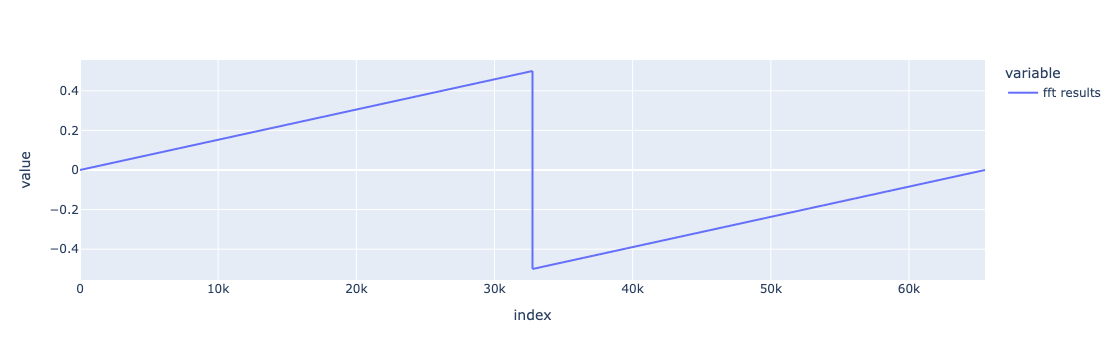

In [413]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [414]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -28.499050443701005,
  'P-value': 0.0,
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -28.499
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [415]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-30.3351448761086),
  'P-value': 0.0,
  'Lags': 61,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -30.335
  P-value                         0.000
  Lags                               61
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [416]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -22.458110903745293,
  'P-value': 0.0,
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -22.458
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}